In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Now time to look through the data

In [3]:
df = pd.read_excel("datasets/MPS-Arrests.xlsx")

In [4]:
df.head()

,Arrest Year,Arrest Month,Arrest Month Name,Gender,Age Group,Ethnicity (4+1),First Arrest Offnece,Domestic Abuse Flag,Arrest Count
0,2019,1,January,Female,Adult,Asian,Assault,No,10
1,2019,1,January,Female,Adult,Asian,Assault,Yes,22
2,2019,1,January,Female,Adult,Asian,Burglary,No,1
3,2019,1,January,Female,Adult,Asian,Driving,No,8
4,2019,1,January,Female,Adult,Asian,Drugs,No,4


In [5]:
df.shape

(16962, 9)

In [6]:
df.dtypes

Arrest Year              int64
Arrest Month             int64
Arrest Month Name       object
Gender                  object
Age Group               object
Ethnicity (4+1)         object
First Arrest Offnece    object
Domestic Abuse Flag     object
Arrest Count             int64
dtype: object

In [7]:
df.describe()

,Arrest Year,Arrest Month,Arrest Count
count,16962.000000,16962.000000,16962.000000
mean,2021.414043,6.239241,42.306980
std,1.590594,3.519561,128.825701
min,2019.000000,1.000000,1.000000
25%,2020.000000,3.000000,2.000000
50%,2022.000000,6.000000,6.000000
75%,2023.000000,9.000000,28.000000
max,2024.000000,12.000000,2559.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16962 entries, 0 to 16961
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Arrest Year           16962 non-null  int64 
 1   Arrest Month          16962 non-null  int64 
 2   Arrest Month Name     16962 non-null  object
 3   Gender                16962 non-null  object
 4   Age Group             16962 non-null  object
 5   Ethnicity (4+1)       16962 non-null  object
 6   First Arrest Offnece  16962 non-null  object
 7   Domestic Abuse Flag   16962 non-null  object
 8   Arrest Count          16962 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.2+ MB


Now that we have some basic info, I will know clean up the dataset for any empty data

In [9]:
df.dropna(inplace=True)
df.describe()

,Arrest Year,Arrest Month,Arrest Count
count,16962.000000,16962.000000,16962.000000
mean,2021.414043,6.239241,42.306980
std,1.590594,3.519561,128.825701
min,2019.000000,1.000000,1.000000
25%,2020.000000,3.000000,2.000000
50%,2022.000000,6.000000,6.000000
75%,2023.000000,9.000000,28.000000
max,2024.000000,12.000000,2559.000000


In [10]:
df.head()

,Arrest Year,Arrest Month,Arrest Month Name,Gender,Age Group,Ethnicity (4+1),First Arrest Offnece,Domestic Abuse Flag,Arrest Count
0,2019,1,January,Female,Adult,Asian,Assault,No,10
1,2019,1,January,Female,Adult,Asian,Assault,Yes,22
2,2019,1,January,Female,Adult,Asian,Burglary,No,1
3,2019,1,January,Female,Adult,Asian,Driving,No,8
4,2019,1,January,Female,Adult,Asian,Drugs,No,4


Now to create a line graph

We first have to look at the total number of arrests made throughout 2019 - 2023. 2024 has been excluded since we will only be working in 12 month spans and as of writing the dataset only goes to April 2024

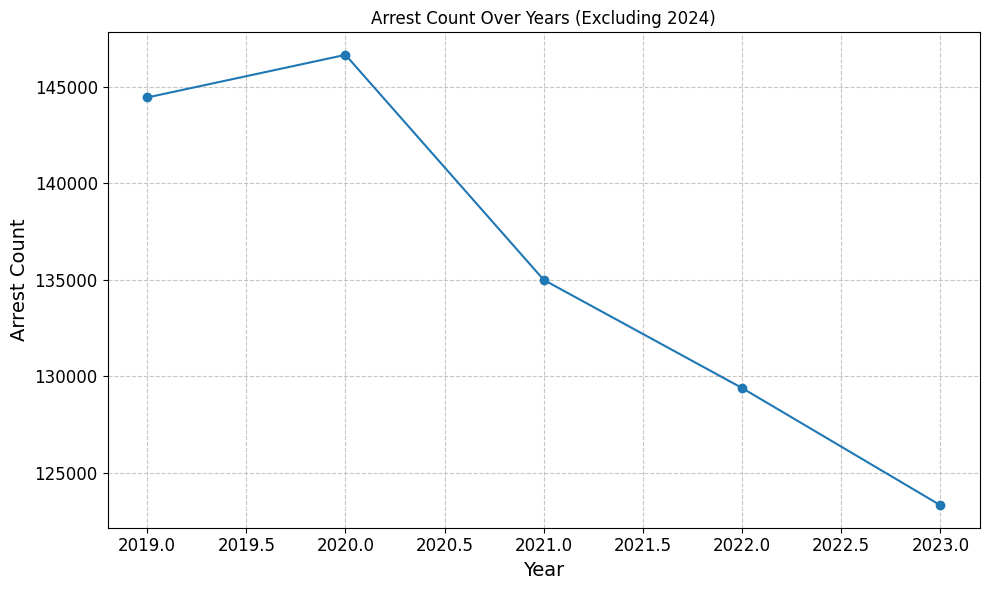

In [11]:
# Filter out data for the year 2024
df_filtered = df[df['Arrest Year'] != 2024]

# Group filtered data by arrest year and calculate the sum of arrest counts
arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

# Plot the data
plt.figure(figsize=(10, 6))  # Adjust the figure size

plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-')

# Customize the plot
plt.title('Arrest Count Over Years (Excluding 2024)')
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines with transparency
plt.tight_layout() 

# Show the plot
plt.show()

I will be looking into 5 types of crime and analysing it.

These are:

    Murder

    Drugs

    Assault

    Burglary
    
    Immigration
    
I will also be looking at different Genders and ethnicity's throughout this analysis.

Lets first take a look into the different types of crime throughout the years

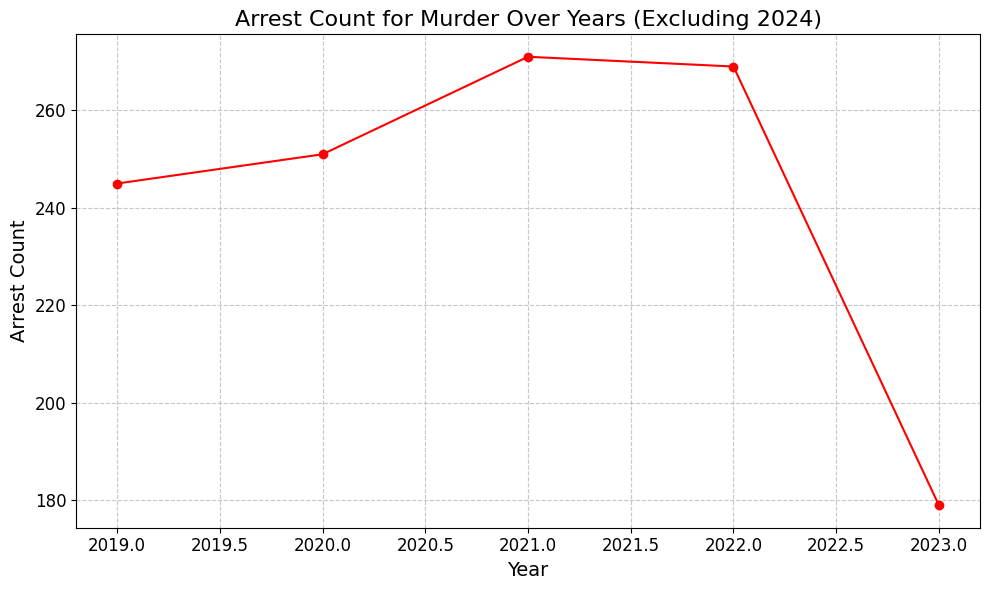

In [12]:
df_filtered = df[(df['First Arrest Offnece'] == 'Murder') & (df['Arrest Year'] != 2024)]

# Group the filtered data by arrest year and calculate the sum of arrest counts
arrests_per_year = df_filtered.groupby('Arrest Year')['First Arrest Offnece'].count()

# Plot the data
plt.figure(figsize=(10, 6))

plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="red")

# Customize the plot
plt.title('Arrest Count for Murder Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines with transparency
plt.tight_layout() 

# Show the plot
plt.show()


We can clearly see that there is a big decline in arrests linked to murder in London with about 179 arrests in 2023.

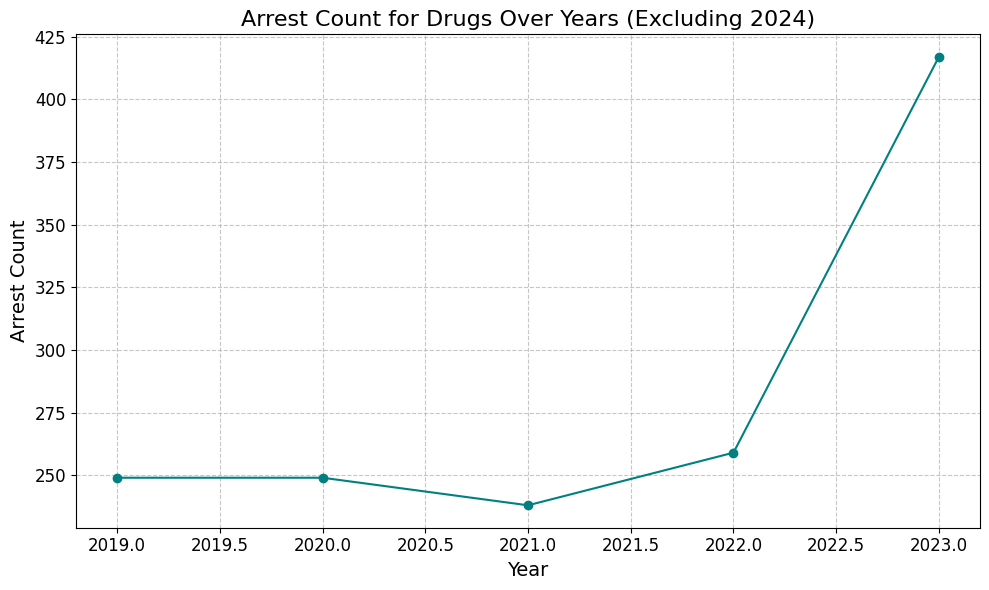

In [13]:
df_filtered = df[(df['First Arrest Offnece'] == 'Drugs') & (df['Arrest Year'] != 2024)]

# Group the filtered data by arrest year and calculate the sum of arrest counts
arrests_per_year = df_filtered.groupby('Arrest Year')['First Arrest Offnece'].count()

# Plot the data
plt.figure(figsize=(10, 6))  # Adjust the figure size

plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="teal")

# Customize the plot
plt.title('Arrest Count for Drugs Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines with transparency
plt.tight_layout() 

# Show the plot
plt.show()


With the drugs count we can see that the number of arrests is at an all time high

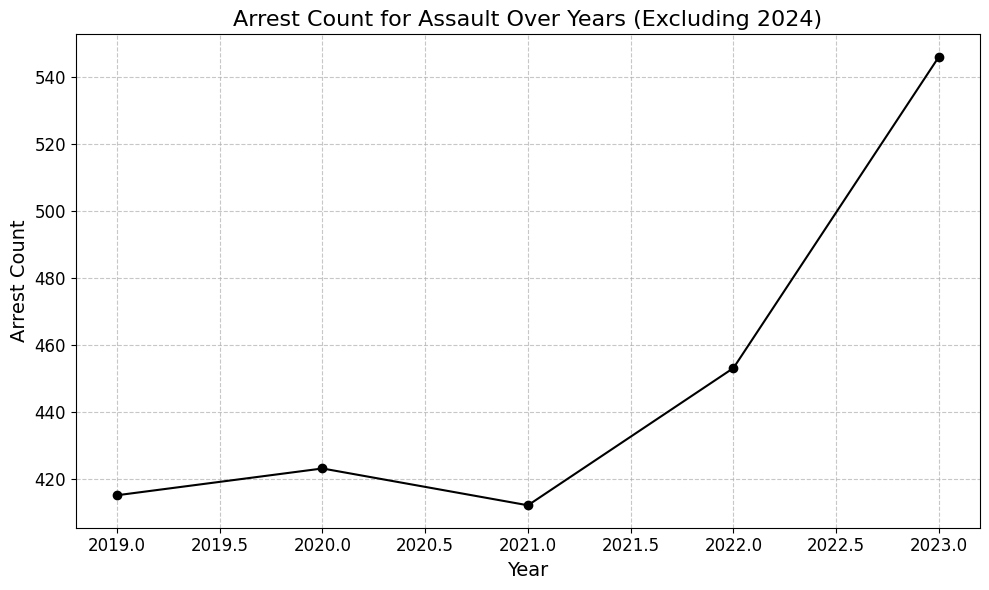

In [14]:
df_filtered = df[(df['First Arrest Offnece'] == 'Assault') & (df['Arrest Year'] != 2024)]

# Group the filtered data by arrest year and calculate the sum of arrest counts
arrests_per_year = df_filtered.groupby('Arrest Year')['First Arrest Offnece'].count()

# Plot the data
plt.figure(figsize=(10, 6))  # Adjust the figure size

plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="black")

# Customize the plot
plt.title('Arrest Count for Assault Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines with transparency
plt.tight_layout() 

# Show the plot
plt.show()

Again like the drugs arrest count, the arrested linked to assault are also at an all time high

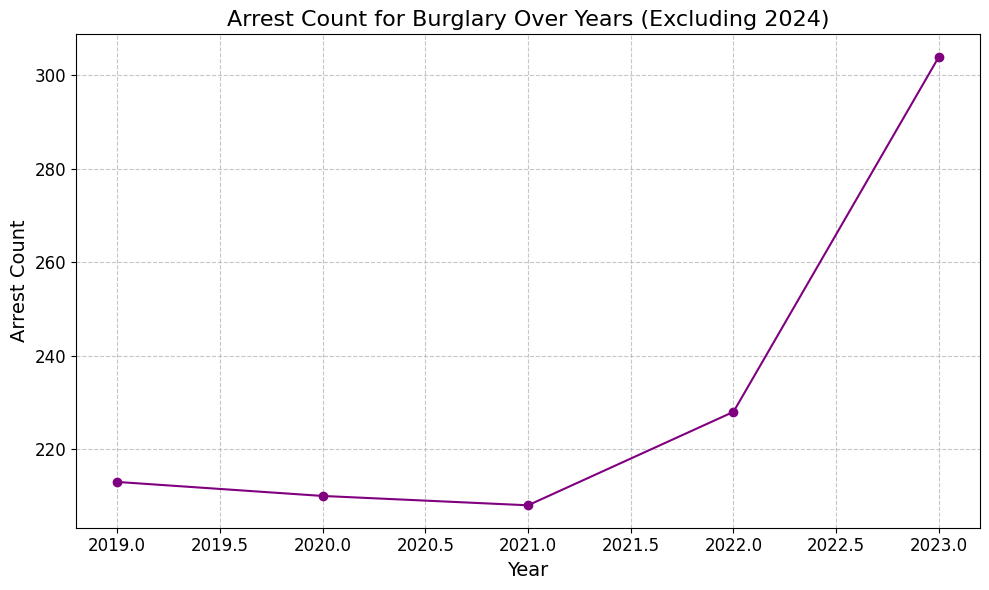

In [15]:
df_filtered = df[(df['First Arrest Offnece'] == 'Burglary') & (df['Arrest Year'] != 2024)]

# Group the filtered data by arrest year and calculate the sum of arrest counts
arrests_per_year = df_filtered.groupby('Arrest Year')['First Arrest Offnece'].count()

# Plot the data
plt.figure(figsize=(10, 6))  # Adjust the figure size

plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="purple")

# Customize the plot
plt.title('Arrest Count for Burglary Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines with transparency
plt.tight_layout() 

# Show the plot
plt.show()

Again the arrest count for burglary is at record highs

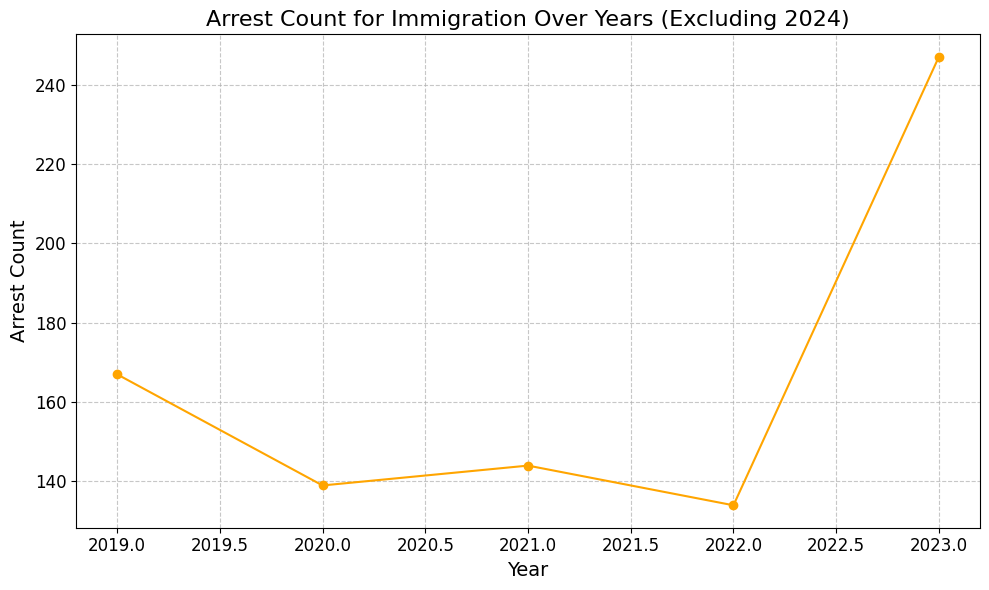

In [16]:
df_filtered = df[(df['First Arrest Offnece'] == 'Immigration') & (df['Arrest Year'] != 2024)]

# Group the filtered data by arrest year and calculate the sum of arrest counts
arrests_per_year = df_filtered.groupby('Arrest Year')['First Arrest Offnece'].count()

# Plot the data
plt.figure(figsize=(10, 6))  # Adjust the figure size

plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="orange")

# Customize the plot
plt.title('Arrest Count for Immigration Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines with transparency
plt.tight_layout() 

# Show the plot
plt.show()

As we can see with all these graphs, every crime type has increased between 2022 - 2023 except for Murder.

Now lets take a deeper dive into each type of crime

I will be analysing each crime type with their gender roles and comparing the two

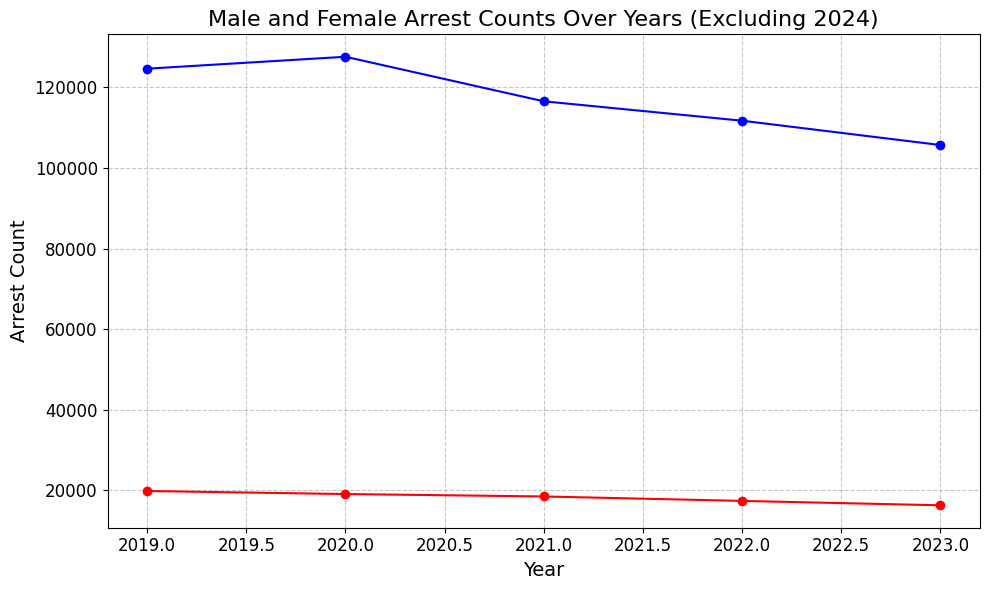

In [34]:
# Filter the DataFrame to include only the data where the "Gender" is "Male" and exclude the year 2024
male_df_filtered = df[(df['Gender'] == 'Male') & (df['Arrest Year'] != 2024)]
# Group the filtered data by arrest year and calculate the sum of arrest counts for males
male_arrests_per_year = male_df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

# Filter the DataFrame to include only the data where the "Gender" is "Female" and exclude the year 2024
female_df_filtered = df[(df['Gender'] == 'Female') & (df['Arrest Year'] != 2024)]
# Group the filtered data by arrest year and calculate the sum of arrest counts for females
female_arrests_per_year = female_df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

plt.figure(figsize=(10, 6))

# Plot the data for male arrests
plt.plot(male_arrests_per_year.index, male_arrests_per_year.values, marker='o', linestyle='-', color='b', label='Male Arrests')
# Plot the data for female arrests
plt.plot(female_arrests_per_year.index, female_arrests_per_year.values, marker='o', linestyle='-', color='r', label='Female Arrests')

plt.title('Male and Female Arrest Counts Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()


Here we can see that there are much less female arrests over male arrests

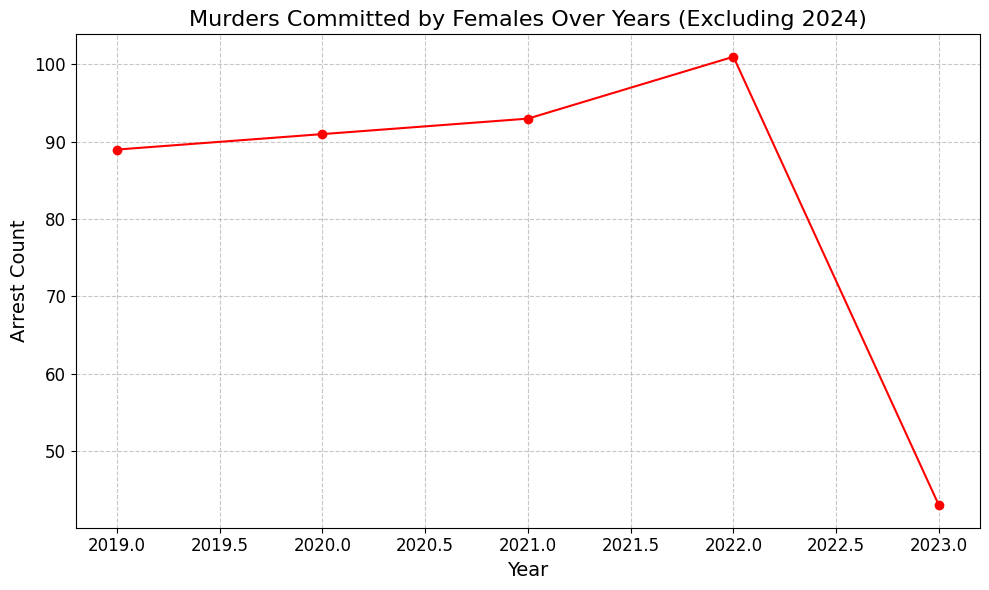

In [47]:
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Murder")]

arrests_per_year = df_filtered.groupby('Arrest Year').size()

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

# Customise the plot
plt.title('Murders Committed by Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

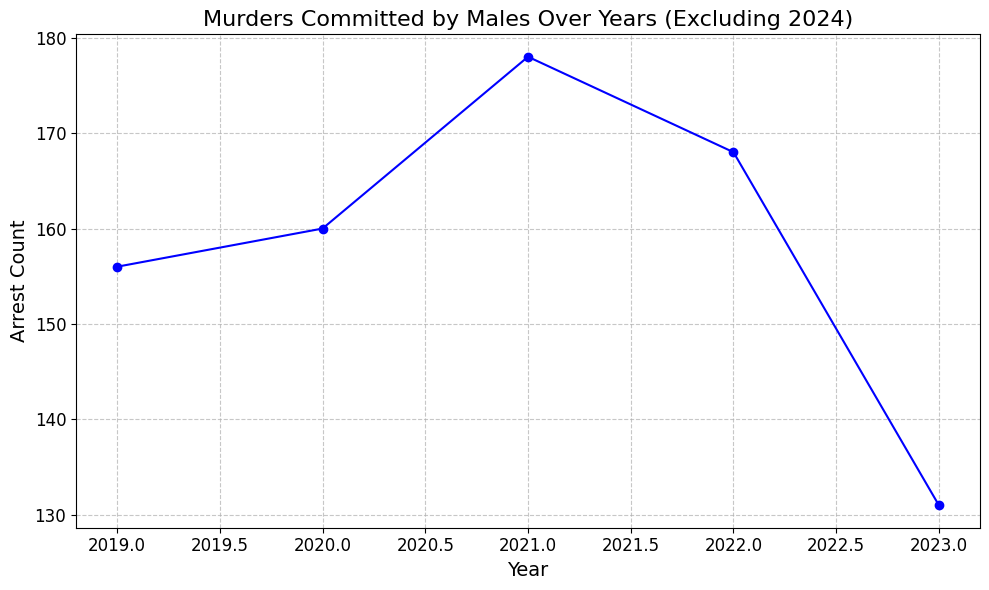

In [49]:
df_filtered = df[(df['Gender'] == "Male") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Murder")]

arrests_per_year = df_filtered.groupby('Arrest Year').size()

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="b")

# Customise the plot
plt.title('Murders Committed by Males Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()